In [1]:
import pickle as pkl
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
tempFolder = '/home/ak/Documents/Research/temp/'
pickleFiles = [s for s in os.listdir(tempFolder) if ".pkl" in s]
destinationFolder = '/home/ak/Documents/Research/Papers/figures/'

In [3]:
symbols = [pickleFiles[s].split(".")[0] for s in range(len(pickleFiles))]
symbolsSet = list(set(symbols))

In [4]:
symbolsSet


['CPG',
 'BLT',
 'CCL',
 'APF',
 'SHP',
 'AAL',
 'CNA',
 'RDSb',
 'RSA',
 'RTO',
 'BARC',
 'LAND',
 'PSON',
 'AZN']

In [5]:
mklf1score=dict()
avgf1score=dict()
testaccuracyMKL =dict()
testaccuracyAVG =dict()
tprDictMKL = dict()
fprDictMKL = dict()
aucDictMKL = dict()
tprDictAVG = dict()
fprDictAVG = dict()
aucDictAVG = dict()

#read all the symbols and extract the Average Kernel and MKL performance

for symbolidx, _ in enumerate(symbolsSet):
    pickleFileSymbolAvg = "".join((tempFolder,"".join((symbolsSet[symbolidx],'.L_one_day_ahead_average_kernel_results.pkl'))))
    pickleFileSymbolMKL = "".join((tempFolder,"".join((symbolsSet[symbolidx],'.L_one_day_ahead_multiple_kernel_results.pkl'))))
    mklfile = pkl.load(open(pickleFileSymbolMKL, "rb"), encoding='latin1')
    avgfile = pkl.load(open(pickleFileSymbolAvg, "rb"), encoding='latin1')
    
    mklf1score[symbolsSet[symbolidx]] =mklfile['f1_score']
    avgf1score[symbolsSet[symbolidx]] =avgfile['f1_score']
    testaccuracyAVG[symbolsSet[symbolidx]] =avgfile['test_accuracy']
    testaccuracyMKL[symbolsSet[symbolidx]] =mklfile['test_accuracy']
    tprDictMKL[symbolsSet[symbolidx]] =mklfile['tpr']
    fprDictMKL[symbolsSet[symbolidx]] =mklfile['fpr']
    tprDictAVG[symbolsSet[symbolidx]] =avgfile['tpr']
    fprDictAVG[symbolsSet[symbolidx]] =avgfile['fpr']

outputList = [mklf1score, avgf1score, testaccuracyMKL, tprDictMKL, tprDictAVG, fprDictMKL, fprDictAVG]
    
                           

In [6]:
for symbol in symbolsSet:
    
    print(symbol, len(tprDictMKL[symbol]))

CPG 758
BLT 22
CCL 182
APF 1900
SHP 67
AAL 210
CNA 32
RDSb 1162
RSA 2180
RTO 2279
BARC 67
LAND 2460
PSON 665
AZN 1416


In [7]:
idx = mklf1score.keys()


In [8]:

target = outputList[5]
df = pd.concat([pd.Series(target[i]) for i in idx], axis=1).T
df.index = idx

In [9]:
keys=list(target.keys())

In [10]:
import numpy as np
lst=list(target[keys[1]])

In [11]:
#pd.DataFrame(list(map(np.ravel, lst))).T #converting list of arrays to dataframe

In [12]:
#need to extract the name somehow

In [13]:
f1scores =dict()
testaccuracy =dict()

pklidx=1
mklResults = "".join((tempFolder,pickleFiles[1]))
avgResults = "".join((tempFolder,pickleFiles[0]))
print(pickleFiles[pklidx].split(".")[0])

CCL


In [14]:
symbolsSet

['CPG',
 'BLT',
 'CCL',
 'APF',
 'SHP',
 'AAL',
 'CNA',
 'RDSb',
 'RSA',
 'RTO',
 'BARC',
 'LAND',
 'PSON',
 'AZN']

In [15]:
testAccuracyMKL = pd.DataFrame.from_dict(testaccuracyMKL, orient='index')
testAccuracyAVG = pd.DataFrame.from_dict(testaccuracyAVG, orient='index')
f1scoreMKL = pd.DataFrame.from_dict(mklf1score, orient='index')
f1scoreAVG = pd.DataFrame.from_dict(avgf1score, orient='index')



In [16]:
testAccuracyAVG.median(axis=1)

CPG     0.912585
BLT     0.971205
CCL     0.817882
APF     0.586957
SHP     0.976471
AAL     0.971774
CNA     0.975804
RDSb    0.994061
RSA     0.850386
RTO     0.902513
BARC    0.961023
LAND    0.843543
PSON    0.880038
AZN     0.968639
dtype: float64

In [17]:
testAccuracyMKL.median(axis=1)

CPG     0.834470
BLT     0.748735
CCL     0.762658
APF     0.652174
SHP     0.805069
AAL     0.612554
CNA     0.924739
RDSb    0.940630
RSA     0.781206
RTO     0.693288
BARC    0.795665
LAND    0.742212
PSON    0.806971
AZN     0.957091
dtype: float64

In [18]:
f1scoreAVG.median(axis=1)

CPG     0.630653
BLT     0.666362
CCL     0.586675
APF     1.000000
SHP     0.628863
AAL     0.562802
CNA     0.638689
RDSb    0.699101
RSA     0.637941
RTO     0.562813
BARC    0.661761
LAND    0.584655
PSON    0.525436
AZN     0.741437
dtype: float64

In [19]:
F1ScoreTable = pd.DataFrame(columns=['median','StDev','Average'])
F1ScoreTable['median'] = f1scoreAVG.median(axis=1).round(2)
F1ScoreTable['StDev'] = f1scoreAVG.std(axis=1).round(2)

def LatexTable(df, resultsDf):
    df['Median']= resultsDf.median(axis=1).round(2)
    df['Average'] =resultsDf.mean(axis=1).round(2)
    df['St.Dev'] =resultsDf.std(axis=1).round(2)
    return df
    
    

In [20]:
F1Table = pd.DataFrame()
print(LatexTable(F1Table, f1scoreAVG).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Median &  Average &  St.Dev \\
\midrule
CPG  &    0.63 &     0.62 &    0.07 \\
BLT  &    0.67 &     0.66 &    0.11 \\
CCL  &    0.59 &     0.60 &    0.07 \\
APF  &    1.00 &     0.96 &    0.09 \\
SHP  &    0.63 &     0.62 &    0.11 \\
AAL  &    0.56 &     0.56 &    0.06 \\
CNA  &    0.64 &     0.62 &    0.07 \\
RDSb &    0.70 &     0.67 &    0.11 \\
RSA  &    0.64 &     0.64 &    0.09 \\
RTO  &    0.56 &     0.58 &    0.09 \\
BARC &    0.66 &     0.67 &    0.10 \\
LAND &    0.58 &     0.61 &    0.09 \\
PSON &    0.53 &     0.56 &    0.08 \\
AZN  &    0.74 &     0.74 &    0.07 \\
\bottomrule
\end{tabular}



In [21]:
df=pd.DataFrame()
# df['BARC'] =np.array(mkldict['BARC'])
# df['APF'] =np.array(mkldict['APF'])
# # df['BLT']=mkldict['BLT']
# df =pd.DataFrame({'BARC': pd.Series(a), 'b': pd.Series(b)})
df =pd.DataFrame.from_dict({'BARC': mklf1score['BARC'], 
                            'APF': mklf1score['APF'], 
                            'BLT':mklf1score['BLT'], 
                            'AZN':mklf1score['AZN'],
                            'CNA':mklf1score['CNA'],
                            'AAL':mklf1score['AAL'],
                            'SHP':mklf1score['SHP'],
                            'CPG':mklf1score['CPG'],
                            'RSA':mklf1score['RSA'], 
                            'LAND':mklf1score['LAND']
                           }, orient='index').T

In [22]:
dfaccuracies=pd.DataFrame()
dfaccuracies=pd.DataFrame.from_dict({'BARC': testaccuracyMKL['BARC'],'APF': testaccuracyMKL['APF'],'BLT':testaccuracyMKL['BLT'] }, orient='index').T

In [23]:
dfMeanAccuracy =df.describe().loc[["mean", "std", "50%"]].T.round(2).style.format({'mean': "{:.2%}",'std': "{:.2%}",'50%': "{:.2%}"})

In [24]:
dfmeans =df.describe().loc[["mean", "std", "50%"]].T.round(2)
dfmeans.style.format({'mean': "{:.2%}",'std': "{:.2%}",'50%': "{:.2%}"})
print (dfmeans.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  mean &   std &   50\% \\
\midrule
BARC &  0.63 &  0.07 &  0.62 \\
APF  &  0.85 &  0.12 &  0.85 \\
BLT  &  0.60 &  0.11 &  0.55 \\
AZN  &  0.68 &  0.05 &  0.67 \\
CNA  &  0.59 &  0.01 &  0.59 \\
AAL  &  0.53 &  0.05 &  0.54 \\
SHP  &  0.56 &  0.07 &  0.55 \\
CPG  &  0.55 &  0.04 &  0.55 \\
RSA  &  0.57 &  0.04 &  0.57 \\
LAND &  0.57 &  0.05 &  0.56 \\
\bottomrule
\end{tabular}



In [25]:
mklResultsFile = pkl.load(open(mklResults, "rb"), encoding='latin1')
avgResultsFile = pkl.load(open(avgResults, "rb"), encoding='latin1')

In [26]:
mklKeys = list(mklResultsFile.keys())
avgKeys = list(avgResultsFile.keys())


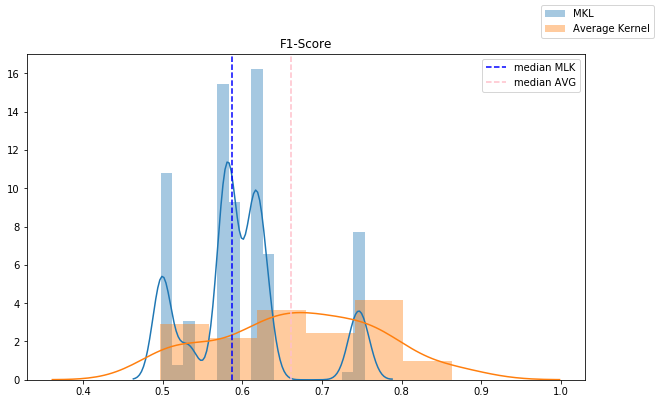

In [27]:
fig = plt.figure(figsize=(10,6))
f1mlk =mklResultsFile['f1_score']
f1avg = avgResultsFile['f1_score']
median=np.median(pd.DataFrame(f1mlk).values)
splot =sns.distplot(f1mlk);
splot2 = sns.distplot(f1avg);
plt.title('F1-Score')
fig.legend(labels=['MKL','Average Kernel'])
medianMLK=np.median(pd.DataFrame(f1mlk).values)
medianAVG=np.median(pd.DataFrame(f1avg).values)

plt.axvline(medianMLK, color='b', linestyle='--',label='MKL Median')
plt.axvline(medianAVG, color='pink', linestyle='--',label='MKL Median')
plt.legend({'median MLK':medianMLK,'median AVG':medianAVG })
plt.show()
f1FileLoc = "".join((destinationFolder,"".join(('Comparispm_','F1_Distribution.png') )))
fig.savefig(f1FileLoc )



NameError: name 'df1x' is not defined

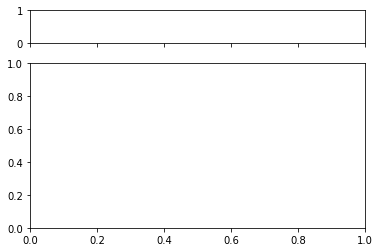

In [29]:
import numpy as np
f,axarr = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=np.average(df1x.values)
median=np.median(df1x.values)
sns.boxplot(df1x, ax=axarr[0])
axarr[0].axvline(mean, color='r', linestyle='--')
sns.distplot(df1x, ax=axarr[1])
axarr[1].axvline(mean, color='r', linestyle='--')
axarr[1].axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
plt.title('F1 Score Distribution for BARC.LN')

_=axarr[0].set(xlabel='')
plt.show()
f1FileLoc = "".join((destinationFolder,"".join(('BARC.L_','F1_Distribution.png') )))
f.savefig(f1FileLoc )


In [184]:
# from matplotlib.backends.backend_pdf import PdfPages

# with PdfPages('myfigures.pdf') as pdf:
# for i in range(1000):
#     plt.subplots(2, 3)
#     axarr[0, 0].plot(x1, y1)
#     axarr[1, 0].plot(x2, y2)

#     pdf.savefig(f)
#     plt.close('all')


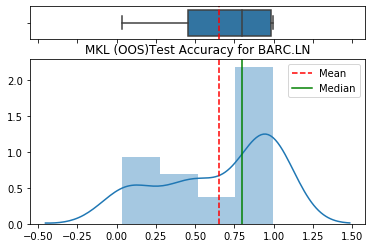

In [185]:
df1y = pd.DataFrame(mklResultsFile['test_accuracy'])

f,axarr = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=np.mean(df1y.values)
median=np.median(df1y.values)
sns.boxplot(df1y, ax=axarr[0])
axarr[0].axvline(mean, color='r', linestyle='--')
sns.distplot(df1y, ax=axarr[1])
axarr[1].axvline(mean, color='r', linestyle='--')
axarr[1].axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
plt.title('MKL (OOS)Test Accuracy for BARC.LN')

_=axarr[0].set(xlabel='')
plt.show()
f1FileLoc = "".join((destinationFolder,"".join(('BARC.L_','test_accuracy.png') )))
f.savefig(f1FileLoc )

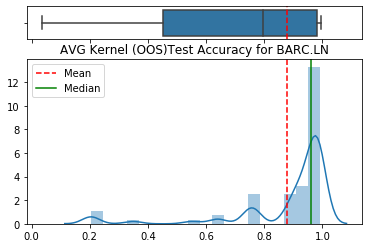

In [186]:
df1z = pd.DataFrame(avgResultsFile['test_accuracy'])

f,axarr = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=np.mean(df1z.values)
median=np.median(df1z.values)
sns.boxplot(df1y, ax=axarr[0])
axarr[0].axvline(mean, color='r', linestyle='--')
sns.distplot(df1z, ax=axarr[1])
axarr[1].axvline(mean, color='r', linestyle='--')
axarr[1].axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
plt.title('AVG Kernel (OOS)Test Accuracy for BARC.LN')

_=axarr[0].set(xlabel='')
plt.show()
f1FileLoc = "".join((destinationFolder,"".join(('BARC.L_','test_accuracy.png') )))
f.savefig(f1FileLoc )

In [187]:
tprList = mklResultsFile['tpr']
fprList = mklResultsFile['fpr']

avgtprList = avgResultsFile['tpr']
avgfprList = avgResultsFile['fpr']

In [188]:
mklResultsFile['auc']

[]

In [189]:
idx=14
## multiple kernel ##
tprMKL = tprList[idx]
fprMKL = fprList[idx]
aucMKL= auc(fprMKL,tprMKL)
## average kernel ##
tprAVG =avgtprList[idx]
fprAVG = avgfprList[idx]
avgAUC = auc(avgfprItem, avgtprItem)

NameError: name 'auc' is not defined

In [190]:
from sklearn.metrics import roc_curve, auc


In [191]:
import numpy as np
len(tprList[4])
len(tprList[5])

83

In [ ]:
def ROC_Graph(fprAVG, tprAVG,fprMKL, tprMKL):
    aucMKL= auc(fprMKL,tprMKL)
    avgAUC = auc(fprAVG, tprAVG)
    fig = plt.figure()
    lw = 2
    plt.plot(fprAVG, tprAVG, color='darkred',lw=lw, label='Avg Kernel ROC curve (area = %0.2f)' % avgAUC)
    plt.plot(fprMKL, tprMKL, color='darkorange',
             lw=lw, label='MKL ROC curve (area = %0.2f)' % aucMKL)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('MKL Receiver operating characteristic: MKL vs Average Kernel ')
    plt.legend(loc="lower right")
    return fig 

plt.show()

In [ ]:
ROC_Graph(fprAVG, tprAVG,fprMKL, tprMKL)

In [ ]:
os.getcwd()

In [ ]:
idx=14
## multiple kernel ##
destinationFolder = '/home/ak/Documents/Research/Papers/figures/'
for idx in range(1, 25):
    tprMKL = tprList[idx]
    fprMKL = fprList[idx]
    ## average kernel ##
    tprAVG =avgtprList[idx]
    fprAVG = avgfprList[idx]
    fig = ROC_Graph(fprAVG, tprAVG,fprMKL, tprMKL)
    fileLoc = "".join((destinationFolder,"".join((str(idx),'AUC.png') )))
    
    plt.savefig(fileLoc)


In [ ]:
fileLoc